# Fit the RLDDM on individual data

In [6]:
import pandas as pd

from rlssm.utility.load_data import load_example_dataset
from rlssm.model.models_DDM import RLDDModel

## Import the data

In [7]:
# import some example data:
data = load_example_dataset(hierarchical_levels = 1)

data.head()

,participant,block_label,trial_block,f_cor,f_inc,cor_option,inc_option,times_seen,rt,accuracy
0,3,1,1,50,41,3,1,1,2.456584,0
1,3,1,2,48,34,3,1,2,2.170168,1
2,3,1,3,52,46,4,2,1,1.494957,0
3,3,1,4,55,48,4,3,2,1.779351,0
4,3,1,5,48,52,4,3,3,1.853335,0


## Initialize the model

In [8]:
# you can "turn on and off" different mechanisms:
model = RLDDModel(hierarchical_levels=1,
                  separate_learning_rates=False,
                  threshold_modulation=False,
                  nonlinear_mapping=True)

Using cached StanModel


## Fit

In [9]:
# sampling parameters
n_warmup = 1000
n_sampling = 3000
n_chains = 2

# learning parameters
K = 4 # n options in a learning block (participants see 2 at a time)
initial_value_learning = 27.5 # initial learning value (Q0)

In [10]:
model_fit = model.fit(
    data,
    K,
    initial_value_learning,
    iter_warmup=n_warmup,
    iter_sampling=n_sampling,
    chains = n_chains)

21:43:40 - cmdstanpy - INFO - CmdStan start processing


Fitting the model using the priors:
alpha_priors {'mu': 0, 'sd': 1}
drift_scaling_priors {'mu': 1, 'sd': 50}
drift_asymptote_priors {'mu': 1, 'sd': 50}
threshold_priors {'mu': 1, 'sd': 5}
ndt_priors {'mu': 1, 'sd': 1}


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

21:45:16 - cmdstanpy - INFO - CmdStan done processing.
21:45:16 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: wiener_lpdf: Random variable  = 1.49496, but must be greater than nondecision time = 1.59442 (in '/home/andrei/PycharmProjects/rlssm/rlssm/stan_models/RLDDM/RLDDM_nonlin.stan', line 90, column 1 to column 59)
	Exception: wiener_lpdf: Random variable  = 1.31217, but must be greater than nondecision time = 1.39826 (in '/home/andrei/PycharmProjects/rlssm/rlssm/stan_models/RLDDM/RLDDM_nonlin.stan', line 90, column 1 to column 59)
	Exception: wiener_lpdf: Random variable  = 1.13969, but must be greater than nondecision time = 1.15478 (in '/home/andrei/PycharmProjects/rlssm/rlssm/stan_models/RLDDM/RLDDM_nonlin.stan', line 90, column 1 to column 59)
	Exception: wiener_lpdf: Random variable  = 1.18971, but must be greater than nondecision time = 1.19317 (in '/home/andrei/PycharmProjects/rlssm/rlssm/stan_models/RLDDM/RLDDM_nonlin.stan', line 90, column 1 to column 

21:45:17 - cmdstanpy - WARNING - Some chains may have failed to converge.
	Chain 1 had 24 divergent transitions (0.8%)
	Chain 2 had 210 divergent transitions (7.0%)
	Use function "diagnose()" to see further information.


Checks MCMC diagnostics:
n_eff / iter looks reasonable for all parameters
0 of 6000 iterations saturated the maximum tree depth of 10 (0.0%)
E-BFMI indicated no pathological behavior
234.0 of 6000 iterations ended with a divergence (3.9%)
  Try running with larger adapt_delta to remove the divergences


### get Rhat

In [11]:
model_fit.rhat

,rhat,variable
name,,
lp__,1.00025,lp__
alpha,1.00191,alpha
drift_scaling,1.00181,drift_scaling
drift_asymptote,1.00125,drift_asymptote
threshold,1.00254,threshold
...,...,...
log_lik[236],1.00345,log_lik[236]
log_lik[237],1.00291,log_lik[237]
log_lik[238],1.00092,log_lik[238]


### get wAIC

In [12]:
model_fit.waic

{'lppd': -126.21139608116157,
 'p_waic': 4.480359885876143,
 'waic': 261.38351193407544,
 'waic_se': 32.934958418596004}

## Posteriors

In [13]:
model_fit.samples.describe()

,transf_alpha,transf_drift_scaling,transf_drift_asymptote,transf_threshold,transf_ndt
count,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000
mean,0.141101,40.336351,2.307844,1.590120,0.880016
std,0.096865,30.334385,0.215126,0.055227,0.008340
min,0.000587,0.452680,1.660340,1.403940,0.836082
25%,0.047937,15.982775,2.160157,1.552375,0.874827
50%,0.131824,34.511050,2.304700,1.589615,0.880603
75%,0.224066,57.514350,2.447705,1.625107,0.885950
max,0.442416,179.585000,3.357640,1.814690,0.902361


In [14]:
import seaborn as sns
sns.set(context = "talk", 
        style = "white", 
        palette = "husl",
        rc={'figure.figsize':(15, 8)})

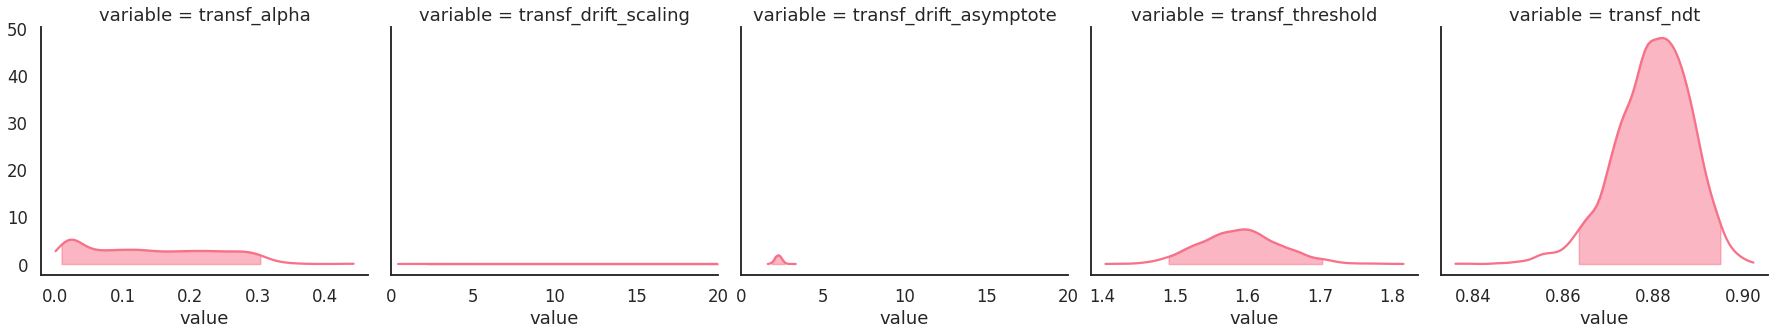

In [15]:
g = model_fit.plot_posteriors(height=5, show_intervals='HDI')

g.axes.flat[1].set_xlim(0, 20)
g.axes.flat[2].set_xlim(0, 20);

## Posterior predictives

### Ungrouped

In [16]:
pp = model_fit.get_posterior_predictives_df(n_posterior_predictives=100)
pp

variable        rt                                                    \
trial          1         2         3         4         5         6     
sample                                                                 
1         2.126434  1.074434  2.030434  1.302434  1.396434  1.459434   
2         1.464120  0.966120  1.989120  1.069120  1.162120  1.575120   
3         2.139815  1.363815  1.344815  0.970815  1.723815  1.130815   
4         1.327075  1.016075  1.316075  1.231075  1.257075  1.261075   
5         1.380171  1.184171  1.129171  1.254171  1.146171  1.672171   
...            ...       ...       ...       ...       ...       ...   
96        1.114587  1.583587  1.075587  1.067587  1.265587  1.568587   
97        1.734193  1.590193  3.423193  1.243193  1.335193  1.364193   
98        1.436832  0.993832  0.948832  1.221832  1.579832  1.039832   
99        2.944108  1.200108  2.033108  1.846108  1.225108  1.408108   
100       1.462748  1.019748  1.907748  1.559748  1.146748  1.308748   

variable                                          ... accuracy                 \
trial          7         8         9         10   ...      231  232  233  234   
sample                                            ...                           
1         1.297434  1.060434  1.018434  1.071434  ...      1.0  1.0  1.0  1.0   
2         1.327120  1.163120  1.556120  1.073120  ...      1.0  1.0  1.0  1.0   
3         1.544815  1.843815  0.989815  0.997815  ...      1.0  1.0  1.0  1.0   
4         1.262075  0.990075  1.601075  1.481075  ...      1.0  1.0  1.0  1.0   
5         3.125171  2.787171  1.147171  1.370171  ...      0.0  1.0  1.0  1.0   
...            ...       ...       ...       ...  ...      ...  ...  ...  ...   
96        1.885587  1.551587  1.136587  1.445587  ...      0.0  1.0  1.0  1.0   
97        1.166193  1.259193  2.038193  1.160193  ...      1.0  1.0  0.0  1.0   
98        2.555832  1.352832  1.233832  2.606832  ...      1.0  1.0  1.0  1.0   
99        1.133108  1.145108  1.758108  1.675108  ...      1.0  1.0  1.0  1.0   
100       2.042748  1.106748  2.460748  1.572748  ...      1.0  1.0  1.0  1.0   

variable                                
trial     235  236  237  238  239  240  
sample                                  
1         1.0  1.0  1.0  1.0  1.0  1.0  
2         1.0  1.0  1.0  1.0  1.0  0.0  
3         1.0  1.0  1.0  1.0  1.0  0.0  
4         1.0  1.0  1.0  1.0  1.0  1.0  
5         1.0  1.0  1.0  0.0  1.0  1.0  
...       ...  ...  ...  ...  ...  ...  
96        1.0  1.0  1.0  1.0  1.0  1.0  
97        0.0  1.0  1.0  1.0  1.0  1.0  
98        1.0  1.0  1.0  1.0  1.0  1.0  
99        1.0  1.0  0.0  1.0  1.0  0.0  
100       1.0  1.0  0.0  1.0  1.0  1.0  

[100 rows x 480 columns]

In [17]:
pp_summary = model_fit.get_posterior_predictives_summary(n_posterior_predictives=100)
pp_summary

,mean_accuracy,mean_rt,skewness,quant_10_rt_low,quant_30_rt_low,quant_50_rt_low,quant_70_rt_low,quant_90_rt_low,quant_10_rt_up,quant_30_rt_up,quant_50_rt_up,quant_70_rt_up,quant_90_rt_up
sample,,,,,,,,,,,,,
1,0.866667,1.416167,1.679138,1.092534,1.165334,1.283434,1.363334,1.972734,1.041934,1.167434,1.281934,1.495134,1.957434
2,0.850000,1.429612,1.502386,1.069120,1.252120,1.378620,1.640620,1.814620,1.092120,1.198120,1.303120,1.506420,1.997920
3,0.808333,1.376923,1.993187,1.017315,1.142315,1.264315,1.463315,1.930815,1.021415,1.109115,1.267815,1.479415,1.877215
4,0.804167,1.357950,1.404058,1.033075,1.117075,1.212075,1.422875,1.811075,1.024275,1.144675,1.250075,1.453275,1.811275
5,0.795833,1.438000,2.000445,1.063971,1.195571,1.333171,1.461571,1.984171,1.046171,1.144171,1.308171,1.508171,1.935171
...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,0.816667,1.396279,1.443568,1.035487,1.134587,1.318087,1.467687,1.947087,1.035587,1.134587,1.273587,1.524087,1.927587
97,0.879167,1.491247,2.131598,1.004393,1.163193,1.259193,1.492993,2.368193,1.071193,1.190193,1.342193,1.583193,2.240193
98,0.908333,1.398969,1.247909,1.059632,1.114332,1.371332,1.592232,1.992532,1.044932,1.161932,1.298832,1.509832,1.911232


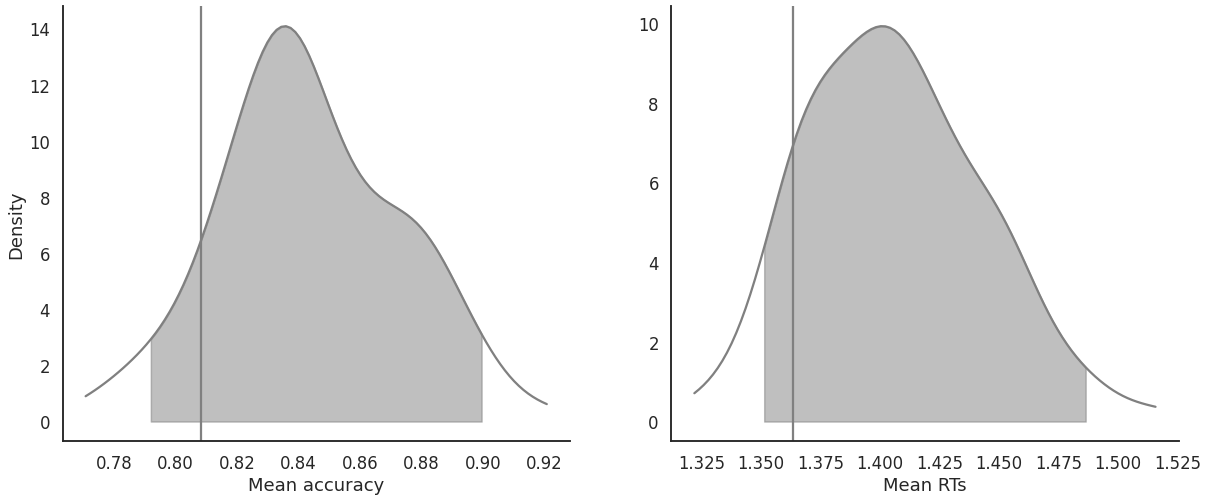

In [18]:
model_fit.plot_mean_posterior_predictives(n_posterior_predictives=100, figsize=(20,8), show_intervals='HDI');

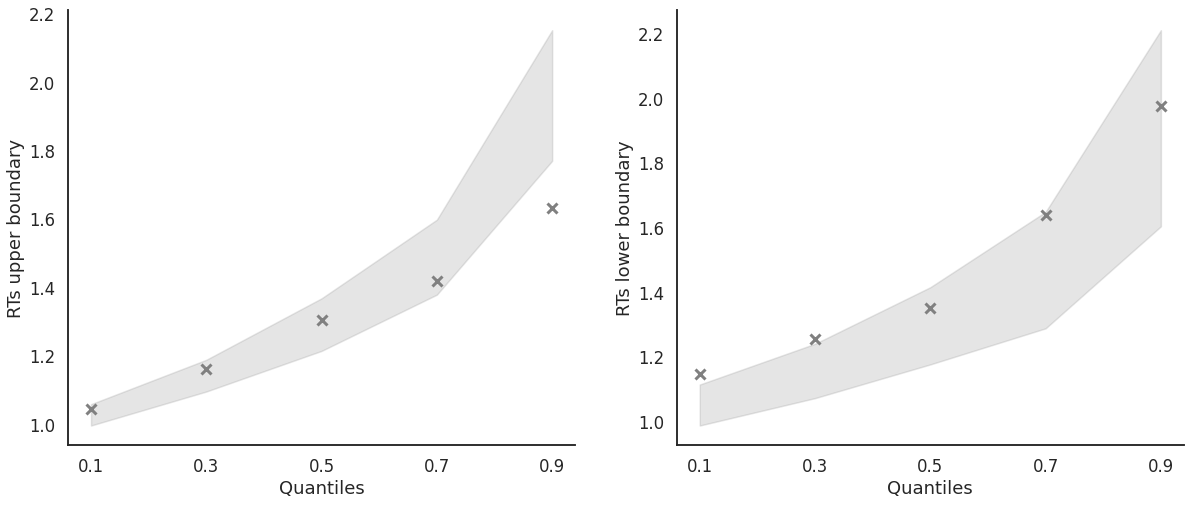

In [19]:
model_fit.plot_quantiles_posterior_predictives(n_posterior_predictives=100, kind='shades');

### Grouped

In [20]:
import numpy as np

In [21]:
# Define new grouping variables, in this case, for the different choice pairs, but any grouping var can do
data['choice_pair'] = 'AB'
data.loc[(data.cor_option == 3) & (data.inc_option == 1), 'choice_pair'] = 'AC'
data.loc[(data.cor_option == 4) & (data.inc_option == 2), 'choice_pair'] = 'BD'
data.loc[(data.cor_option == 4) & (data.inc_option == 3), 'choice_pair'] = 'CD'

data['block_bins'] = pd.cut(data.trial_block, 8, labels=np.arange(1, 9))

In [22]:
model_fit.get_grouped_posterior_predictives_summary(
                grouping_vars=['block_label', 'choice_pair'],
                quantiles=[.3, .5, .7],
                n_posterior_predictives=100)

mean_accuracy   mean_rt  skewness  \
block_label choice_pair sample                                      
1           AB          1                1.00  1.409384  0.823636   
                        2                0.85  1.608170  0.979066   
                        3                0.95  1.365965  1.146862   
                        4                0.75  1.310875  1.486500   
                        5                0.70  1.433021  1.412063   
...                                       ...       ...       ...   
3           CD          96               0.95  1.289187  0.931406   
                        97               0.90  1.563743  2.573425   
                        98               0.90  1.307532  0.741811   
                        99               0.80  1.303958  2.126982   
                        100              0.95  1.533448  2.165643   

                                quant_30_rt_low  quant_30_rt_up  \
block_label choice_pair sample                                    
1           AB          1                   NaN        1.246634   
                        2              1.574320        1.127520   
                        3              2.193815        1.145215   
                        4              1.317075        1.077075   
                        5              1.321171        1.249071   
...                                         ...             ...   
3           CD          96             1.056587        1.127987   
                        97             1.146493        1.198693   
                        98             1.058132        1.135032   
                        99             1.205708        1.143608   
                        100            1.454748        1.117548   

                                quant_50_rt_low  quant_50_rt_up  \
block_label choice_pair sample                                    
1           AB          1                   NaN        1.400934   
                        2              1.627120        1.564120   
                        3              2.193815        1.280815   
                        4              1.349075        1.170075   
                        5              1.480671        1.296671   
...                                         ...             ...   
3           CD          96             1.056587        1.282587   
                        97             1.188693        1.317693   
                        98             1.078332        1.228832   
                        99             1.256108        1.207108   
                        100            1.454748        1.349748   

                                quant_70_rt_low  quant_70_rt_up  
block_label choice_pair sample                                   
1           AB          1                   NaN        1.498234  
                        2              1.735520        1.830520  
                        3              2.193815        1.383415  
                        4              1.386675        1.340275  
                        5              1.579171        1.409971  
...                                         ...             ...  
3           CD          96             1.056587        1.426587  
                        97             1.230893        1.592893  
                        98             1.098532        1.512532  
                        99             1.300408        1.297608  
                        100            1.454748        1.573948  

[1200 rows x 9 columns]

In [23]:
model_fit.get_grouped_posterior_predictives_summary(
                grouping_vars=['block_bins'],
                quantiles=[.3, .5, .7],
                n_posterior_predictives=100)

mean_accuracy   mean_rt  skewness  quant_30_rt_low  \
block_bins sample                                                       
1          1            0.600000  1.400034  0.884195         1.290534   
           2            0.733333  1.400653  2.433361         1.127320   
           3            0.733333  1.345615  0.774933         1.218715   
           4            0.800000  1.311875  0.931743         1.136075   
           5            0.566667  1.365804  0.920987         1.211571   
...                          ...       ...       ...              ...   
8          96           0.866667  1.352354  1.619435         1.054787   
           97           0.866667  1.625660  1.485943         1.177393   
           98           0.800000  1.340932  2.908905         1.094832   
           99           0.900000  1.337075  1.369192         1.281108   
           100          0.933333  1.306581  1.550784         1.603548   

                   quant_30_rt_up  quant_50_rt_low  quant_50_rt_up  \
block_bins sample                                                    
1          1             1.218034         1.406934        1.402934   
           2             1.110220         1.261120        1.260620   
           3             1.221415         1.251315        1.274315   
           4             1.108975         1.217075        1.266575   
           5             1.155371         1.283171        1.284171   
...                           ...              ...             ...   
8          96            1.123087         1.153587        1.251587   
           97            1.233693         1.364193        1.542193   
           98            1.136632         1.260332        1.293832   
           99            1.138308         1.391108        1.272108   
           100           1.083048         1.828748        1.194748   

                   quant_70_rt_low  quant_70_rt_up  
block_bins sample                                   
1          1              1.461334        1.507434  
           2              1.450720        1.488920  
           3              1.272215        1.573415  
           4              1.298575        1.474275  
           5              1.401171        1.618171  
...                            ...             ...  
8          96             1.286187        1.417587  
           97             1.568593        1.838693  
           98             1.370332        1.452232  
           99             1.423508        1.413708  
           100            2.053948        1.402248  

[800 rows x 9 columns]

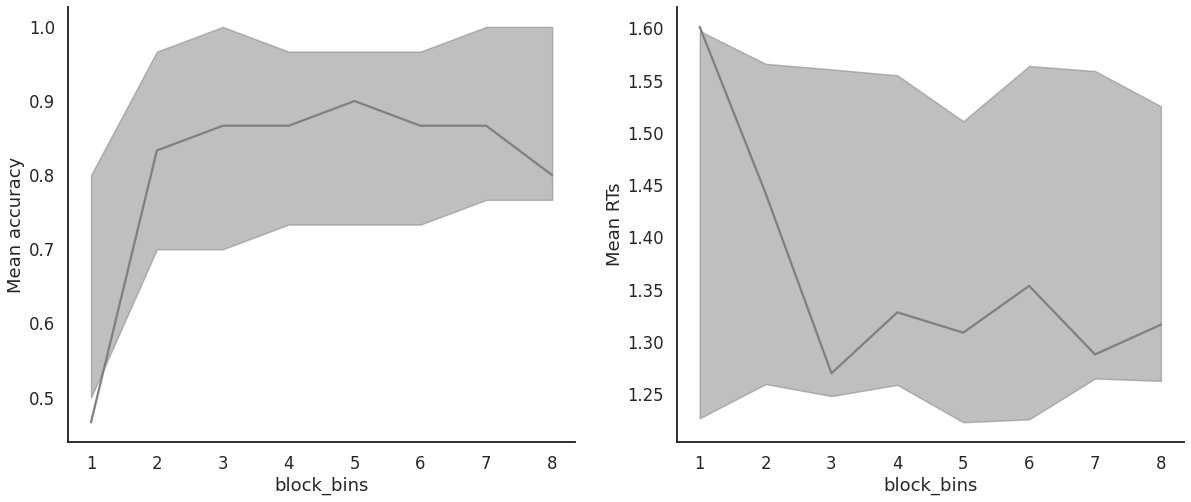

In [24]:
model_fit.plot_mean_grouped_posterior_predictives(grouping_vars=['block_bins'], 
                                                  n_posterior_predictives=100, 
                                                  figsize=(20,8));

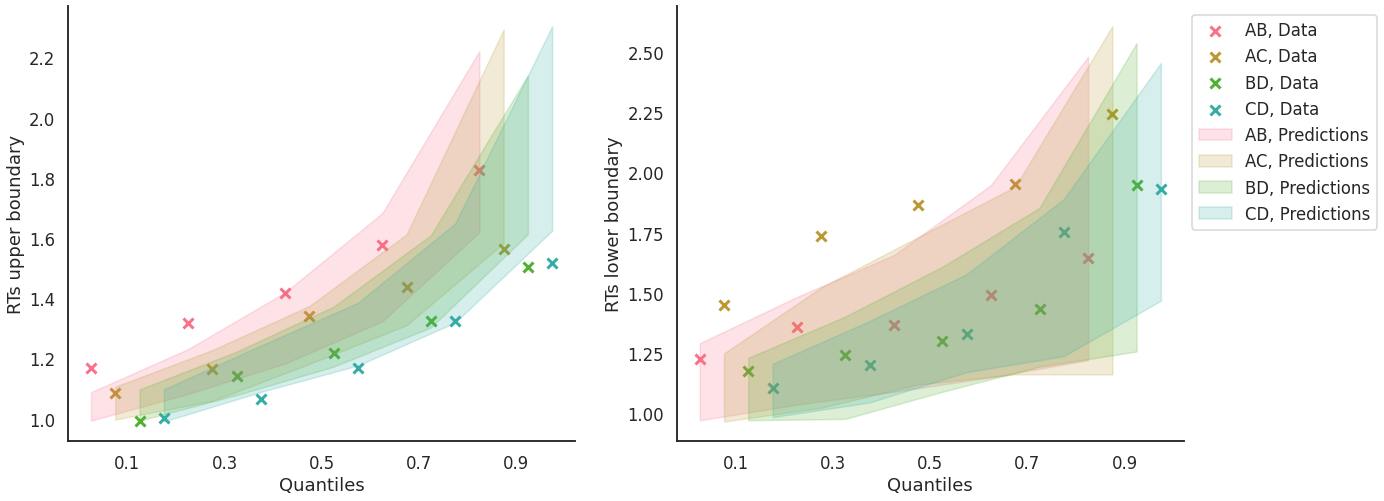

In [25]:
model_fit.plot_quantiles_grouped_posterior_predictives(n_posterior_predictives=100,
                                                        grouping_var='choice_pair',
                                                        kind='shades',
                                                        quantiles=[.1, .3, .5, .7, .9]);

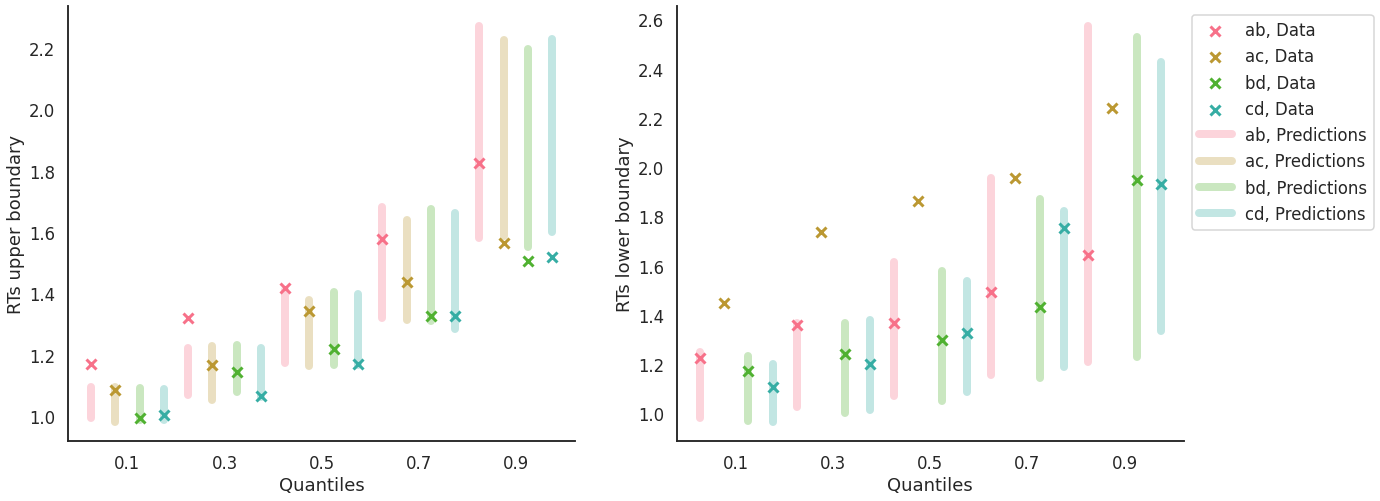

In [26]:
model_fit.plot_quantiles_grouped_posterior_predictives(
    n_posterior_predictives=300,
    grouping_var='choice_pair',
    palette = sns.color_palette('husl'),
    intervals_kws={'alpha': .3, 'lw':8},
    hue_order=['AB', 'AC', 'BD', 'CD'],
    hue_labels=['ab', 'ac', 'bd', 'cd']);